Gather Data (https://www.kaggle.com/competitions/titanic/data)

In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


'Survived': survival of passenger (0 = No, 1 = Yes)

'Pclass': ticket class of passenger (1 = 1st, 2 = 2nd, 3 = 3rd)

'Name': name of passenger

'Sex': sex of passenger

'Age': age in years of passenger

'SibSp': # of siblings / spouses aboard the Titanic

'Parch': # of parents / children aboard the Titanic

'Ticket': Ticket number

'Fare': Passenger fare

'Cabin': Cabin number

'Embarked': Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(df[['Age', 'SibSp', 'Parch', 'Fare']].describe())#int only describe excluding passengerid

              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


How many passengers survived in total, how many died?

How many male and how many female passengers survived?

How many passengers in 1st, 2nd, and 3rd class survived?


# **How many passengers survived, how many died?**

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

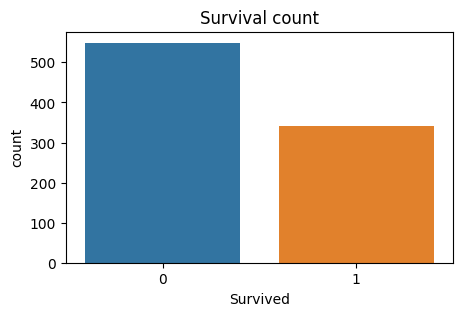

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=df, x='Survived')
plt.title('Survival count')
plt.show()

# **How many male and how many female passengers survived?**

In [ ]:
print(df['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [ ]:
sex_survived = pd.crosstab(df['Sex'], df['Survived'])
print(sex_survived)

Survived    0    1
Sex               
female     81  233
male      468  109


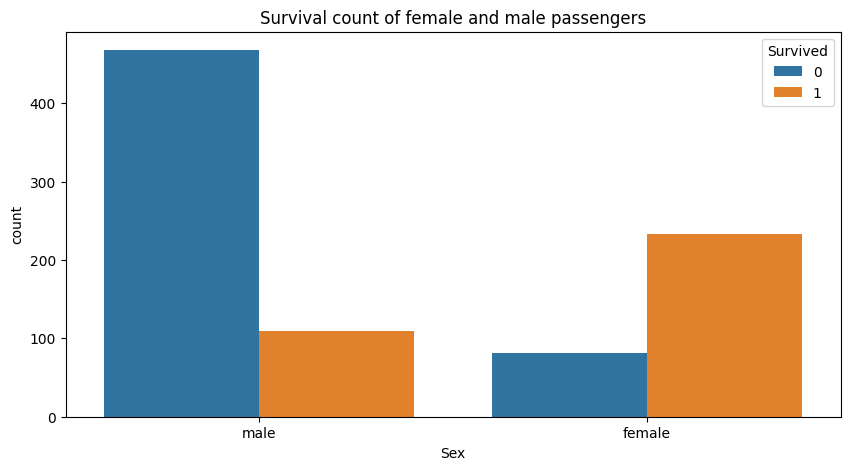

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival count of female and male passengers')
plt.show()

# **I wonder how, I wonder why :3**

# **How is the distribution of age for those passengers that survived and those who died?**

In [ ]:
age_survived = pd.crosstab(df['Age'], df['Survived'])
print(age_survived)

Survived  0  1
Age           
0.42      0  1
0.67      0  1
0.75      0  2
0.83      0  2
0.92      0  1
...      .. ..
70.00     2  0
70.50     1  0
71.00     2  0
74.00     1  0
80.00     0  1

[88 rows x 2 columns]


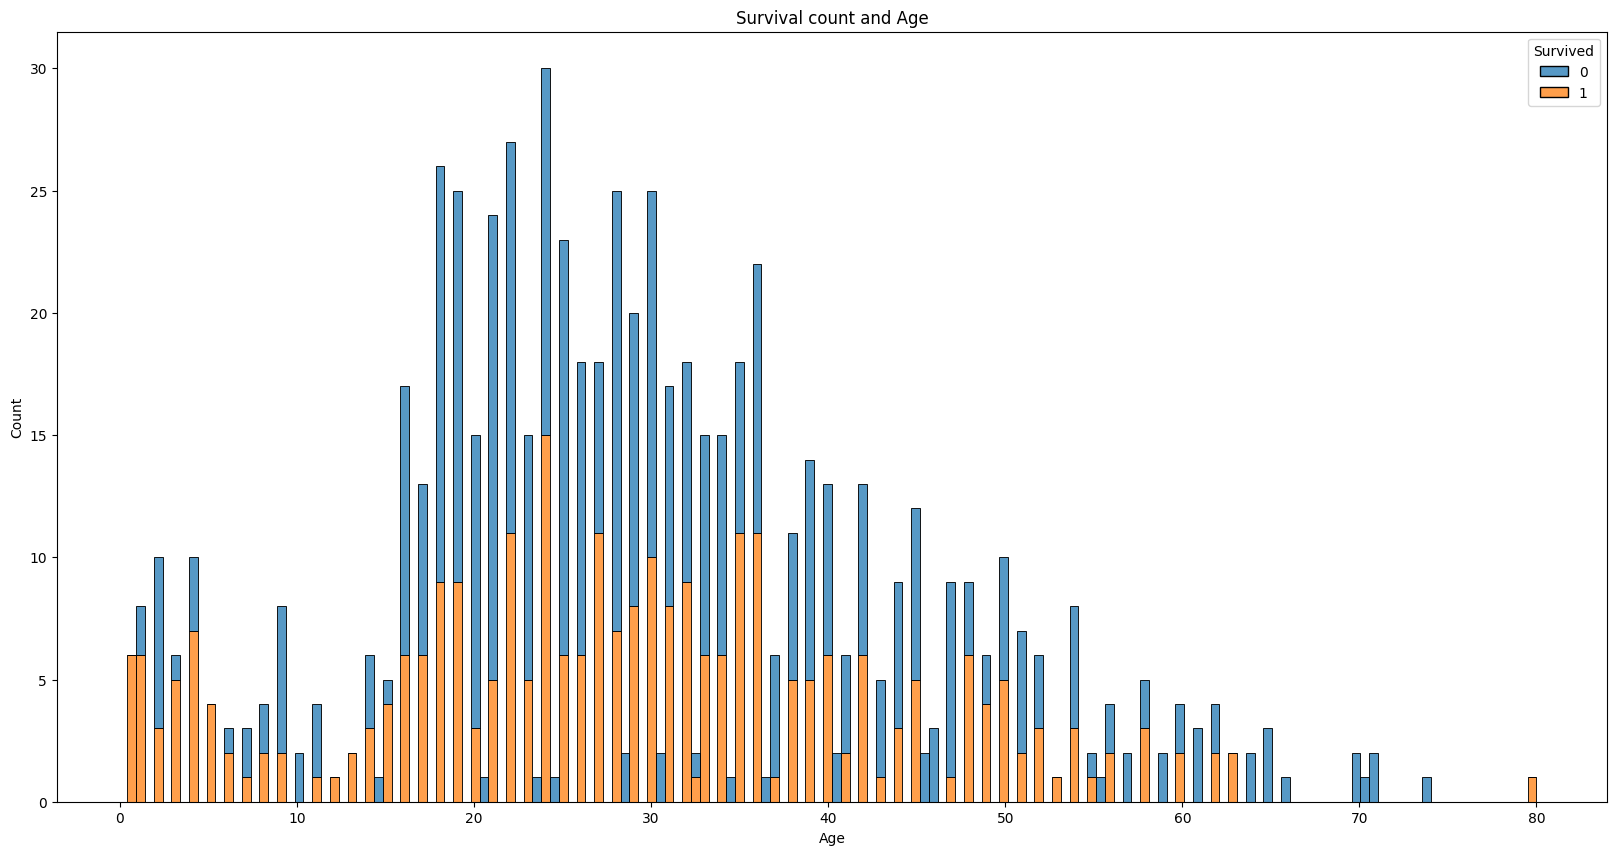

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=df, x='Age', hue='Survived', bins=160, multiple='stack', ax=ax)
plt.title('Survival count and Age')
plt.show()

# **How many passengers in 1st, 2nd, and 3rd class survived?**

In [ ]:
class_survived = pd.crosstab(df['Pclass'], df['Survived'])
print(class_survived)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


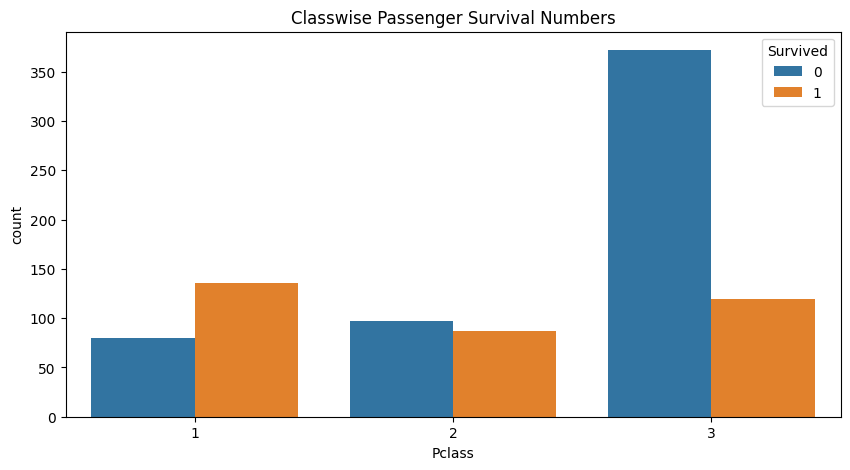

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Classwise Passenger Survival Numbers')
plt.show()

# **How many passengers from different ports survived?**

In [ ]:
port_survived = pd.crosstab(df['Embarked'], df['Survived'])
print(class_survived)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


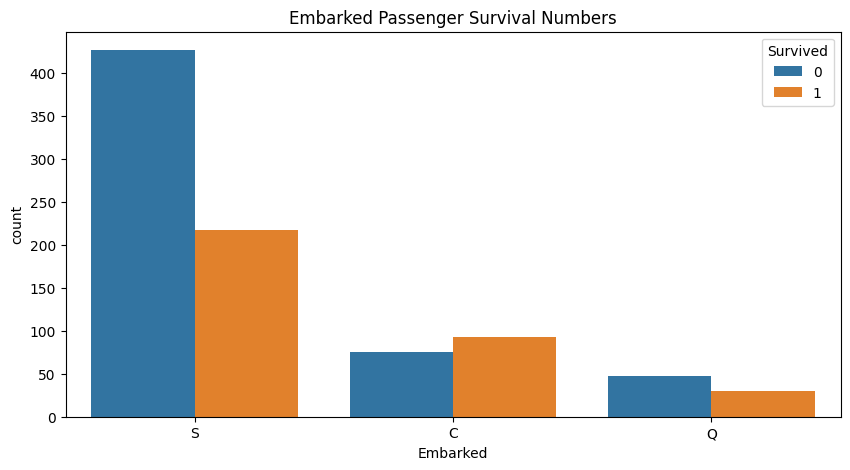

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Embarked Passenger Survival Numbers')
plt.show()

# **KNN Application**

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
new_df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis =1)
new_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
new_df['Embarked'] = lb.fit_transform(new_df['Embarked'])
lb2 = LabelEncoder()
new_df['Sex'] = lb2.fit_transform(new_df['Sex'])
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [ ]:
lb2.classes_

array(['female', 'male'], dtype=object)

In [ ]:
new_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [ ]:
import numpy as np
print(np.mean(new_df['Age']))

29.69911764705882


In [ ]:
new_df['Age'] = new_df['Age'].fillna(np.mean(new_df['Age']))

In [ ]:
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
x = new_df.drop(['Survived'],axis = 1)
y = new_df['Survived']

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# **Preparing Test Data**

In [ ]:
import pandas as pd
df2 = pd.read_csv('test.csv')
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
new_df2 = df2.drop(['PassengerId','Name','Ticket','Cabin'],axis =1)

new_df2['Embarked'] = lb.transform(new_df2['Embarked'])
new_df2['Sex'] = lb2.transform(new_df2['Sex'])

new_df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
new_df2['Age'] = new_df2['Age'].fillna(np.mean(new_df2['Age']))

In [ ]:
new_df2['Fare'] = new_df2['Fare'].fillna(np.mean(new_df2['Fare']))

In [ ]:
new_df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# **BUT WE DONT HAVE GROUND TRUTH ;-;**

# **BACK TO TRAIN TEST SPLIT**

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5, p = 1)
clf.fit(x_train,y_train)

KNeighborsClassifier(p=1)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

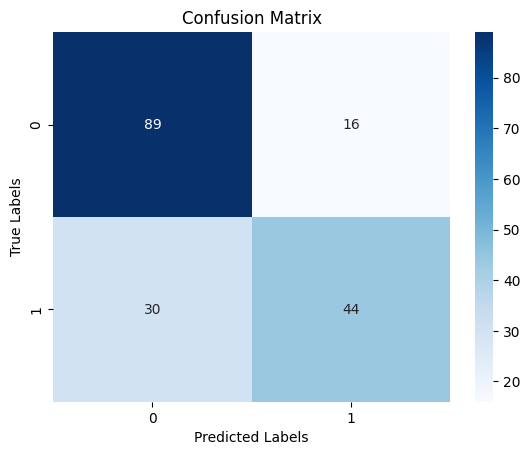

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       105
           1       0.73      0.59      0.66        74

    accuracy                           0.74       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.74      0.74      0.74       179



# **Best K Value**

In [ ]:
from sklearn.metrics import accuracy_score
accuracies = []
k_values = [x for x in range(1,50,2)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

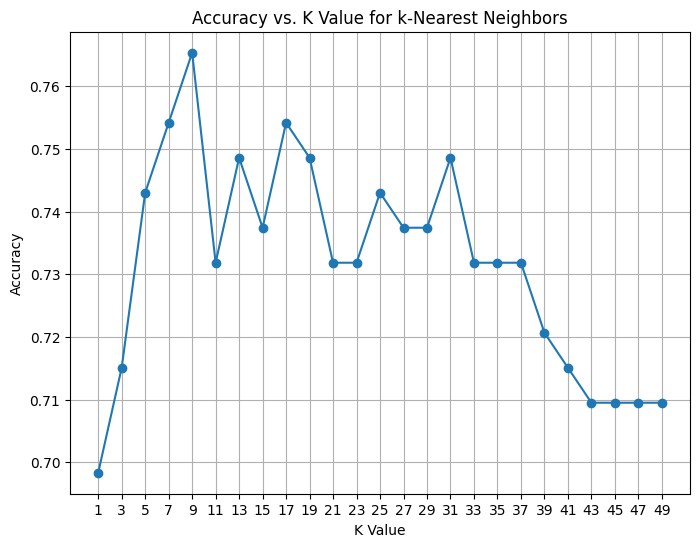

In [ ]:
from sklearn.metrics import accuracy_score
accuracies = []
k_values = [x for x in range(1,50,2)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value for k-Nearest Neighbors")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

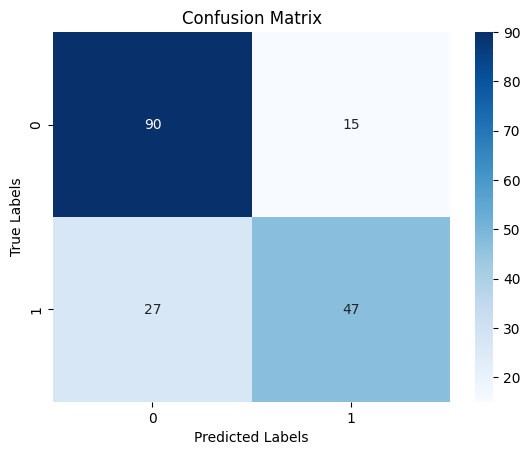

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       105
           1       0.76      0.64      0.69        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 9, p = 1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()
print(cr)

# **0:**

Precision = 90/(90+27)

Recall = 90/(90+15)

# **1:**

Precision = 47/(47+15)

Recall = 47/(47+27)

precision = kitnay sahi predict kye vs. kitnay total woh label predict kiya

recall = kitnay sahi predict kye vs. kitnay total woh label thay in the data

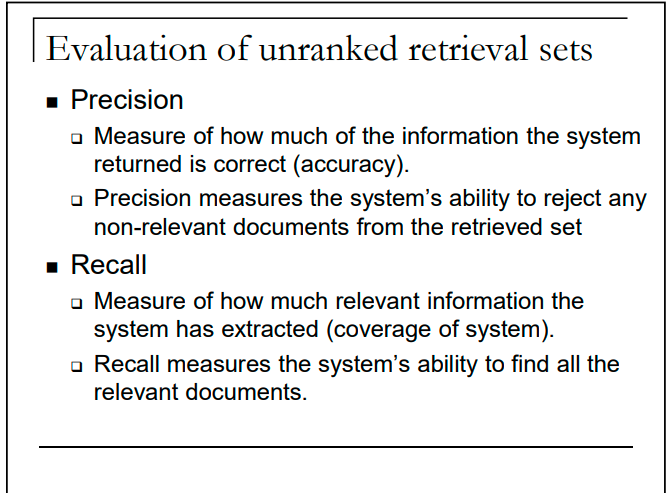

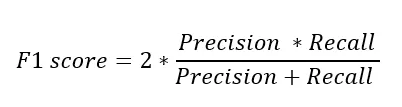

Titanic data first, try using a different number of columns and parameters to get a higher accuracy (maybe scale) :)

and then https://www.kaggle.com/datasets/uciml/mushroom-classification

